<a href="https://colab.research.google.com/github/yh0010/Graduate_Program_Records/blob/2021_Summer_Tandon_Scholar_Intro2ML/W1_ElainaH_1_explore_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: yh4310
-   **Name**: Elaina(Yaogui) Huang

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

The data shows how users’ mobility patterns - what types of places they
spend time in - varied over the course of the COVID-19 pandemic.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

When you are finished, make sure you have run all of the cells in the
notebook (in order), and then create a PDF from it. Submit the PDF on
Gradescope.

**Important note**: You won’t necessarily have learned or seen in
advance how to use all the Python commands and library functions you
need to complete this assignment. That’s OK. Part of the learning
objective here is to practice finding and applying that kind of new
information as you go! Use the library documentation, search the
Internet, or ask questions on Ed if you need any help.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# TODO Q1
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [ ]:
# TODO Q2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5722158 entries, 0 to 5722157
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

In [ ]:
# TODO Q3
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [ ]:
# TODO Q4
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5722158 entries, 0 to 5722157
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   country_region_code                                 object        
 1   country_region                                      object        
 2   sub_region_1                                        object        
 3   sub_region_2                                        object        
 4   metro_area                                          object        
 5   iso_3166_2_code                                     object        
 6   census_fips_code                                    float64       
 7   place_id                                            object        
 8   date                                                datetime64[ns]
 9   retail_and_recreation_percent_change_from_baseline  float64       
 10  grocery_and_pharma

Next, you are going to extract the subset of data for the U.S. state of
your choice. You can choose any location *except* New York.

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single U.S. state (but *not* New York).

In [ ]:
# TODO Q5
df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("North Carolina")) & (df['sub_region_2'].isnull())]
df_subset

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
5171008,US,United States,North Carolina,NaN,NaN,US-NC,NaN,ChIJgRo4_MQfVIgRGa4i6fUwP60,2020-02-15,6.0,-1.0,23.0,4.0,-1.0,-1.0
5171009,US,United States,North Carolina,NaN,NaN,US-NC,NaN,ChIJgRo4_MQfVIgRGa4i6fUwP60,2020-02-16,3.0,-3.0,-5.0,-1.0,-1.0,0.0
5171010,US,United States,North Carolina,NaN,NaN,US-NC,NaN,ChIJgRo4_MQfVIgRGa4i6fUwP60,2020-02-17,5.0,2.0,46.0,6.0,-11.0,2.0
5171011,US,United States,North Carolina,NaN,NaN,US-NC,NaN,ChIJgRo4_MQfVIgRGa4i6fUwP60,2020-02-18,1.0,0.0,14.0,6.0,1.0,0.0
5171012,US,United States,North Carolina,NaN,NaN,US-NC,NaN,ChIJgRo4_MQfVIgRGa4i6fUwP60,2020-02-19,2.0,4.0,-9.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5171485,US,United States,North Carolina,NaN,NaN,US-NC,NaN,ChIJgRo4_MQfVIgRGa4i6fUwP60,2021-06-06,-3.0,5.0,50.0,-3.0,-9.0,1.0
5171486,US,United States,North Carolina,NaN,NaN,US-NC,NaN,ChIJgRo4_MQfVIgRGa4i6fUwP60,2021-06-07,-3.0,7.0,47.0,-10.0,-29.0,6.0
5171487,US,United States,North Carolina,NaN,NaN,US-NC,NaN,ChIJgRo4_MQfVIgRGa4i6fUwP60,2021-06-08,-1.0,10.0,57.0,-9.0,-28.0,6.0
5171488,US,United States,North Carolina,NaN,NaN,US-NC,NaN,ChIJgRo4_MQfVIgRGa4i6fUwP60,2021-06-09,-2.0,8.0,46.0,-9.0,-29.0,6.0


Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

Also check whether there are any missing rows of data. What date range
is represented in this data? Is every day within that range included in
the data?

In [ ]:
# TODO Q6
df_subset = df_subset.sort_values(by='date')
min_dt = df_subset.date.min()
max_dt = df_subset.date.max()
print("min_dt: ",min_dt)
print("max_dt: ",max_dt)
print()
df_subset.isnull().sum()
#conclusion: date ranges from 2020/02/15 to 2021/06/08 on date-basis, and everyday within this range contains data except
#the regional2 data, metro_area and the census_fips_code

min_dt:  2020-02-15 00:00:00
max_dt:  2021-06-10 00:00:00



country_region_code                                     0
country_region                                          0
sub_region_1                                            0
sub_region_2                                          482
metro_area                                            482
iso_3166_2_code                                         0
census_fips_code                                      482
place_id                                                0
date                                                    0
retail_and_recreation_percent_change_from_baseline      0
grocery_and_pharmacy_percent_change_from_baseline       0
parks_percent_change_from_baseline                      0
transit_stations_percent_change_from_baseline           0
workplaces_percent_change_from_baseline                 0
residential_percent_change_from_baseline                0
dtype: int64

In [ ]:
df_subset_copy = df_subset.copy()
df_subset_copy = df_subset_copy.drop(columns='sub_region_2')
df_subset_copy = df_subset_copy.drop(columns='metro_area')
df_subset_copy = df_subset_copy.drop(columns='census_fips_code')
df_subset_copy.isnull().sum()
#the reason I drop these is because since I'm only looking at state-level, the county/city level data are not used && census fips code have
#exact same missing values as the others two do, I think they are all linked so I decide to drop them all

country_region_code                                   0
country_region                                        0
sub_region_1                                          0
iso_3166_2_code                                       0
place_id                                              0
date                                                  0
retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              0
dtype: int64

**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? (Even if, for
the U.S. state you have chosen, the data is complete, explain why some
data may be missing for other regions.)

**Include a short quote from the material you read in the “Learn about
the data” section to answer this question. Indicate that it is a quote
using quotation marks or a block quote, and cite the source, including a
URL.**


**Answer:**
The dataset pull from NC is complete on all "..percent_change_from_baseline" columns.
Reasons that there are missing data could be --- due to Google privacy policy, if the collected data has a potential to leek privacy information, the data is then removed from the collection.


"gaps are intentional and happen because the data doesn’t meet the quality and privacy threshold—when there isn’t enough data to ensure anonymity."
source:  https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927






To track trends in cases and vaccinations alongside mobility trends, we
can also read in data from several other sources. For example,

-   Our World in Data distributes data about COVID-19 vaccination status
    over time for U.S. states in their [Github
    repository](https://github.com/owid/covid-19-data).
-   The New York Times distributes data about COVID-19 cumulative cases
    over time for U.S. states in their [Github
    repository](https://github.com/nytimes/covid-19-data).

You can choose whether to look at vaccination trends or case trends for
the U.S. state you have selected. Use one of the following cells to read
in the data, convert the `date` field to a `datetime`, and get the
subset of the data that applies to the specific U.S. state for which you
are exploring mobility data.

Then, use `pandas` functions to check your new data frame and look at
the first few rows of data.

In [ ]:
# TODO Q8 - Vaccinations option

url_vax = 'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv'
# df_vax = ...
# df_vax['date'] = ...
# df_vax_subset = ...
# check the data frame and look at a few rows

In [ ]:
# TODO Q8 - Cases option

url_cases = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'
df_cases = pd.read_csv(url_cases)
df_cases['date'] = pd.to_datetime(df_cases['date'])
df_cases_subset = df_cases[(df_cases['state'].eq('North Carolina'))]
# check the data frame and look at a few rows
df_cases_subset.head(10)

,date,state,fips,cases,deaths
277,2020-03-03,North Carolina,37,1,0
294,2020-03-04,North Carolina,37,1,0
314,2020-03-05,North Carolina,37,1,0
339,2020-03-06,North Carolina,37,2,0
370,2020-03-07,North Carolina,37,2,0
405,2020-03-08,North Carolina,37,2,0
441,2020-03-09,North Carolina,37,7,0
479,2020-03-10,North Carolina,37,7,0
522,2020-03-11,North Carolina,37,8,0
569,2020-03-12,North Carolina,37,16,0


In [ ]:
min_dt_cases = df_cases_subset.date.min()
max_dt_cases = df_cases_subset.date.max()
print("min_dt_cases: ",min_dt_cases)
print("max_dt_cases: ",max_dt_cases)
print("min_dt: ",min_dt)
print("max_dt: ",max_dt)

min_dt_cases:  2020-03-03 00:00:00
max_dt_cases:  2021-06-12 00:00:00
min_dt:  2020-02-15 00:00:00
max_dt:  2021-06-10 00:00:00


Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen, alongside either
vaccination trends or cases trends.

In the following cell, create a figure with seven subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the date.
On the vertical axes, show (as a line):

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the next subplot
-   either COVID-19 cases or vaccinations in the bottom subplot

Make sure to clearly label each axis. Use `matplotlib` library
documentation to adjust your figures and make your plot look nice!

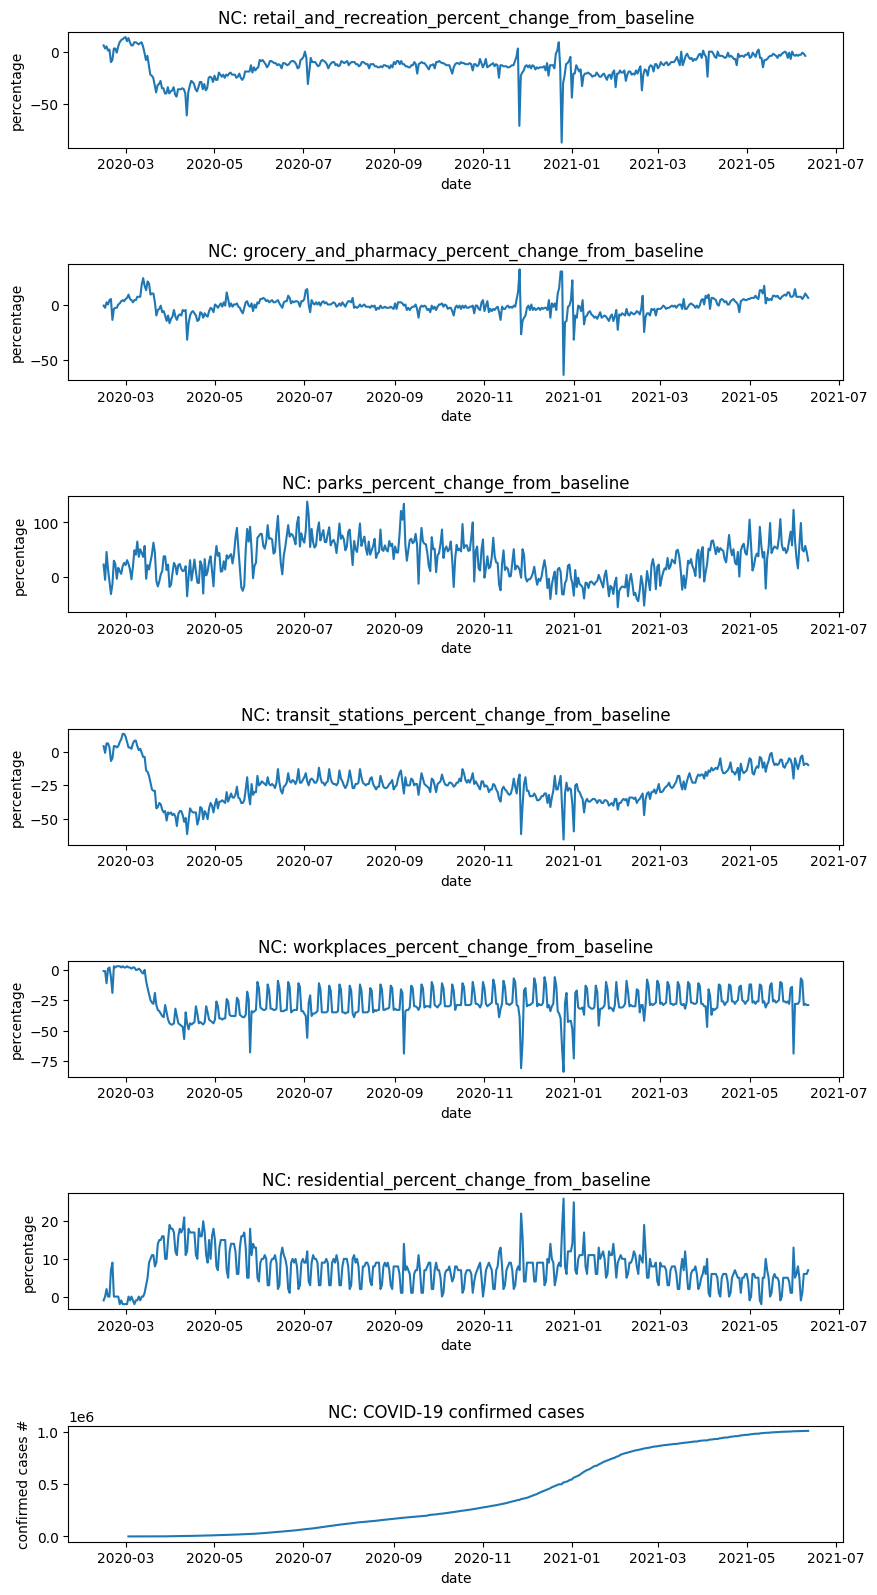

In [ ]:
# TODO Q9
plt.figure(figsize=(10,20), dpi=100)
plot1 = plt.subplot(7,1,1)
plt.plot(df_subset_copy['date'], df_subset_copy['retail_and_recreation_percent_change_from_baseline'])
plt.title('NC: retail_and_recreation_percent_change_from_baseline')
plt.xlabel('date')
plt.ylabel('percentage')

plt.subplot(7,1,2)
plt.plot(df_subset_copy['date'], df_subset_copy['grocery_and_pharmacy_percent_change_from_baseline'])#, label = 'grovery')
plt.title('NC: grocery_and_pharmacy_percent_change_from_baseline')
plt.xlabel('date')
plt.ylabel('percentage')

plt.subplot(7,1,3)
plt.plot(outer_merged_copy['date'], outer_merged_copy['parks_percent_change_from_baseline'])#, label = 'parks')
plt.title('NC: parks_percent_change_from_baseline')
plt.xlabel('date')
plt.ylabel('percentage')

plt.subplot(7,1,4)
plt.plot(outer_merged_copy['date'], outer_merged_copy['transit_stations_percent_change_from_baseline'], label = 'transit')
plt.title('NC: transit_stations_percent_change_from_baseline')
plt.xlabel('date')
plt.ylabel('percentage')

plt.subplot(7,1,5)
plt.plot(outer_merged_copy['date'], outer_merged_copy['workplaces_percent_change_from_baseline'], label = 'workplaces')
plt.title('NC: workplaces_percent_change_from_baseline')
plt.xlabel('date')
plt.ylabel('percentage')

plt.subplot(7,1,6)
plt.plot(outer_merged_copy['date'], outer_merged_copy['residential_percent_change_from_baseline'], label = 'residential')
plt.title('NC: residential_percent_change_from_baseline')
plt.xlabel('date')
plt.ylabel('percentage')

plt.subplot(7,1,7, sharex=plot1)
plot2 =plt.plot(df_cases_subset['date'], df_cases_subset['cases'])
plt.title('NC: COVID-19 confirmed cases')
plt.xlabel('date')
plt.ylabel('confirmed cases #')
plt.subplots_adjust(hspace = 1)
plt.show()

**TODO** Q10: Answer the following questions:

-   Do the results seem to satisfy “common sense”?

  **Yes.**
-   Make sure to explain any trends, patterns, or notable anomalies
    observed in your mobility data.
-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to COVID-19 cases, non-pharmaceutical
    interventions such as stay-at-home orders, or vaccinations?

    **1. Begin by March 2020, when the COVID outburst is widely noticed within U.S. here in the graph:** 

    **Residential prior to March 2020 the percentage was comparatively low, began by March 2020 to before May 2020 the pecentage inclined and reached the lowest point around April.**

    **Workplace, transit, retail and recreation had a sharp drop during that period of time.**

    **However, grocery and pharmacy had a sharp increased during in that period of time, due to people had increased time spent in-home result in food and antiseptic consumptions went up.**

    **The patterns described above persist as COVID confirmed cases develop. For instance the park percentage, when the summer time arrived, in the meanwhile the confirmed cases haven't rose, the percentage in park has shown an increase from May, and when the cases number is growing the park percentage shows decline.**

-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to other factors?

    **The workplace percentage appears to have many irregular sharp drops that do not match the pattern in cases chart. I believe, even though, the sharp drop is related to COVID or indirectly cause by COVID since we still haven't get rid of this virus, but it's likely a result of employee termination, or company calling bankrupcy, or change of work-from-home policy.**

    **Known that people traveled last year during thanksgiving week(11/28) and chritmas(12/25) and year's eve(12/31) in 2020, could explain the increase presented in residential percentage. This could also explain the sharp increase in grocery and pharmacy as people needed to buy gifts/foods for the holidays, this could also explain the sharp drop in retail and recreation which are closed during the holidays, when the stores were closed, the capacity for sure was dropped to the lowest point.**

    **To interpret the irregular frequent increase and decrease throughout the residential pecentage, it's possibily due to people go out during the day or during the weekday or weekends then go back home to rest and sleep or to work from home, result in these irregular patterns.**
-   Cite specific evidence from your plot to support your answer.

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why their mobility data
might *not* be useful for understanding the effect of COVID-19-related
interventions, or why the data might be misleading.

-   For the U.S. state you have chosen, briefly answer *all* of the
    questions in that checklist, and explain how your answer affects the
    validity of the data.

**1.Did anything significant happen between Jan 3 and Feb 6, 2020?
Each day’s baseline is the median day-value from the 5-week period in January. Think about local events and seasonal changes that might bias the baseline:**

**- Did your region experience a cold winter or a summer transitioning into fall? : No.**

**- Did public holidays fall on the same day of the week? : Martin Luther King(Jan 20), Lunar New year(Jan 25), Groundhog day(Feb 2)**

**- Do you have other data sources (such as road tolls, parking meters, or subway turnstiles) that you could help you determine the expected change? : No. I don't have anything else.**

**2. How do park visitors change from January to now?
Both day-to-day and seasonal weather affects visitors to parks:**

**- In typical years, is there any difference in how often people visit parks between January and today? : Yes. Janurary, many people might have not finished their travel as a lot of people uses the vacation days around this period of time in the entire year, also the weather is still cold in US so there won't have many people as right now in June.**

**- Using weather records, how do park visitors change on rainy days compared to sunny days? : Less people will come to the park when rains, more people will be in the park for the entire day when sunny.**

**- Do you have park records from previous years that can help you calibrate the changes from this year? : No I do not.**

**3. How much more time do you think people will spend in residential places?
Estimate the number of hours you think people used to spend in residential places before any responses to COVID-19. Estimate weekdays and weekends separately:**

**- How might the hours change for different jobs? : For example, an office worker(will likely have full-access to the work-from-home benefits), a stay-at-home parent(will continue stay at home), a student(will not go to school because COVID and stay at home to attend zoom university), a grocery-store worker(is still foced to work at store but with less workers), or a nurse who works shifts(will likely just live inside the hospital because the COVID increased cases)**

**- For each group in your community, estimate how many hours of the day you expect them to stay in residential places while responding to COVID-19. : an office worker(24 hours), a stay-at-home parent(24 hours), a student(24 hours), a grocery-store worker(varies, might be 24 hours or 20 hours because working part-time, or just 12 hours like regular), or a nurse who works shifts(could be 24 hours if they can or 0 hours if they live in hospital)**

**- Do you need to adjust your estimates based on the season or academic terms? : No. Because during COVID, everything shuts down, and the season/academic term change do not make a different.**

**4. How might types of work affect the mobility changes on weekdays or weekends?
We don’t report any changes for types of work, but you can think about the different jobs people in your community do on weekends and the jobs on weekdays.**

**- How might COVID-19 responses affect different jobs? : Technical work professionals might not get any negative impact at all, non-technical work professionals get more negative impact than ever.**

**- Would the effects be different for weekday workers than weekend workers? : For technical work professionals, I believe there won't be too much differences unless the differences coming from clients not able to make a payment during COVID financial harship therefore result in business reduction. For non technical work professionals I believe there will more negative impact as in the past the weekends had the highest capacity in-store but due to COVID outburst there won't be the same.**

**5. How well is your region represented?
We create these reports using the same kind of data used to show popular times in Google Maps. Answer the following:**

**- How many places of interest does Google Maps show for your region? How does your region compare to other regions? Open Google Maps and check. : I live in Bayonne, NJ, and this is nothing like what's in Manhattan NY. There aren't that many people/places of interest in this region compare to Manhattan but if compare with other region then this place have 2-3 times more.**

**- Does your region contain workplaces that don’t allow mobile devices? For example, government buildings or military bases. How might this affect the number of visitors to workplaces? : I do not known if there's such a place in my region but if it exist, I believe it will have very low capacity at all times, because regular people do not have an interest to go to such a place.**

-   Based on your answers, do you think there are any serious problems
    associated with using this data for understanding user mobility
    changes due to COVID-19?
    **Yes. After reviewing through all the questions from callibrate region, I realize there are many uncertainties that I could not answer with 100% confidence, and these uncertainties could potentially compromise the data accuracy.**